In [1]:
import os
#os.environ["SCIPY_ARRAY_API"] = "1"
import tempfile

import scanpy as sc
import scvi
from rich import print

/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/bnvlab2/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import

In [2]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.3.1.post1

### Load reference data

In [3]:
adata_atlas = sc.read("/home/bnvlab2/scVI_brain_organoids/no_erythocytes_atlas/annot_scANVI_5_allgenes.h5ad")

In [4]:
adata_atlas

AnnData object with n_obs × n_vars = 658059 × 67814
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Age', 'CellClass', 'CellCyclePhase', 'Region', 'Subregion', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'dissection', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'cluster_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'percent.rb', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.1', 'seurat_clusters', 'GSM', 'GSE', 'batch_n', 'age', 'region', 'cell_cluster', 'CytoTRACE2_Score', 'CytoTRACE2_Potency', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKN

In [5]:
rename_dict = {
    'Early Neurons': 'Early Neurons',
    'Radial Glia': 'Radial Glia',
    'Mature Neurons': 'Mature Neurons',
    'IPC': 'IPC',
    'Astrocytes': 'Astrocytes',
    'OPC': 'OPC',
    'Radial Glia Prolif': 'Progenitors Prolif',
    'Neural crest': 'Neural crest',
    'Glial Progenitors': 'Glial Progenitors',
    'Oligodendrocytes': 'Oligodendrocytes',
    'Mesenchyma': 'Mesenchyma',
    'NC derived neurons': 'NC derived neurons',
    'Microglia': 'Microglia',
    'IPC Prolif': 'Progenitors Prolif',
    'Ependymal': 'Ependymal',
    'Choroid Plexus': 'Choroid Plexus',
    'Spinal cord/Hindbrain': 'Radial Glia',
    'Endothelial cells': 'Mesenchyma',
    'CR': 'Mature Neurons',
    'Immune': 'Microglia'
}
adata_atlas.obs["annot"] = adata_atlas.obs["annot_scANVI_leiden_30_3_256NB_5_res2_V2"].astype('str').map(rename_dict).astype('category')


In [6]:
col = 'annot'
ser = adata_atlas.obs[col]
print(type(ser.dtype), ser.dtype)            

<class 'pandas.core.dtypes.dtypes.CategoricalDtype'> category

In [7]:
adata_atlas.obs["annot"].value_counts()

annot
Early Neurons         246627
Radial Glia           194584
Mature Neurons         95505
IPC                    28719
Astrocytes             15701
Progenitors Prolif     15250
OPC                    11483
Neural crest           10036
Glial Progenitors       8536
Mesenchyma              8053
Oligodendrocytes        7908
NC derived neurons      6302
Microglia               5036
Ependymal               2200
Choroid Plexus          2119
Name: count, dtype: int64

## Run DE on all cell types

In [ ]:
sc.tl.rank_genes_groups(
    adata_atlas, 
    groupby='annot', 
    method='wilcoxon',
    use_raw=False,
    #layer='counts'
)

In [ ]:
df_markers_adata_atlas = sc.get.rank_genes_groups_df(adata_atlas, group=None)

In [ ]:
df_markers_adata_atlas.to_csv('df_markers_adata_atlas_all.csv')

### Select only cell types that was predicted in organoids

In [ ]:
adata_atlas_subset = adata_atlas[~adata_atlas.obs['annot'].isin(['OPC', 'Oligodendrocytes', 
                                                                 'Microglia',  'Astrocytes'])]

In [ ]:
col = 'annot'
ser = adata_atlas_subset.obs[col]
print(type(ser.dtype), ser.dtype)               


In [ ]:
adata_atlas_subset.obs["annot"].value_counts()

In [ ]:
import numpy as np

In [ ]:
import scanpy as sc

sc.tl.rank_genes_groups(
    adata_atlas_subset, 
    groupby='annot', 
    method='wilcoxon',
    use_raw=False,
)

In [ ]:
df_markers_adata_atlas_subset = sc.get.rank_genes_groups_df(adata_atlas_subset, group=None)
df_markers_adata_atlas_subset.to_csv('df_markers_adata_atlas_subset.csv')

## Load query data

In [ ]:
adata_randall = sc.read("/home/bnvlab2/Documents/Kate/Alzheimer/Randall_organoids/randall150_meta_upd.h5ad")

In [ ]:
adata_randall.obs['annot'] =  adata_randall.obs['cell_type_pred3_upd2'].copy()

In [ ]:
# For fetal retina
sc.tl.rank_genes_groups(
    adata_randall, 
    groupby='annot', 
    method='wilcoxon',
    use_raw=False,
    #layer='counts'
)

In [ ]:
df_markers_adata_randall = sc.get.rank_genes_groups_df(adata_randall, group=None)

In [ ]:
df_markers_adata_randall.to_csv('df_markers_adata_randall.csv')

In [ ]:
import gc
gc.collect()

In [ ]:
### Select n top  DE genes for each cell type 

In [ ]:
top_n = 1500

In [ ]:

ct_atlas = df_markers_adata_atlas_subset['group'].unique()  
ct_randall = df_markers_adata_randall['group'].unique()

atlas_markers = {
    ct: df_markers_adata_atlas_subset[df_markers_adata_atlas_subset['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_atlas
}
randall_marker_sets = {ct: set(genes) for ct, genes in randall_markers.items()}
randall_markers = {
    ct: df_markers_adata_randall[df_markers_adata_randall['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_randall
}


In [ ]:
randall_marker_sets = {ct: set(genes) for ct, genes in randall_markers.items()}
atlas_marker_sets = {ct: set(genes) for ct, genes in atlas_markers.items()}


In [ ]:
import pandas as pd
import numpy as np

jaccard_df = pd.DataFrame(
    np.zeros((len(ct_randall), len(ct_atlas))),
    index=ct_randall,
    columns=ct_atlas
)

for ct1 in ct_randall:
    for ct2 in ct_atlas:
        set1 = randall_marker_sets[ct1]
        set2 = atlas_marker_sets[ct2]
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        jaccard_df.loc[ct1, ct2] = jaccard


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(jaccard_df, annot=True, cmap='Blues', vmax=0.3, ax=ax)
ax.set_xlabel('Human Fetal Retina Cell Type')
ax.set_ylabel('Organoid Cell Type')
ax.set_title('Jaccard Similarity of Top Marker Genes\n(Using "counts" Layer)')
fig.tight_layout()

# Save in high-res PNG and a vector PDF
#fig.savefig(os.path.join(outdir, "jaccard_heatmap_all_1500.png"), dpi=300, bbox_inches="tight")
#fig.savefig( "jaccard_heatmap_all_subset_1500.pdf", bbox_inches="tight")

plt.show()

In [ ]:
df_markers_randall = df_markers_adata_randall
df_markers_HFR = df_markers_adata_atlas_subset

In [71]:
gc.collect()

76570

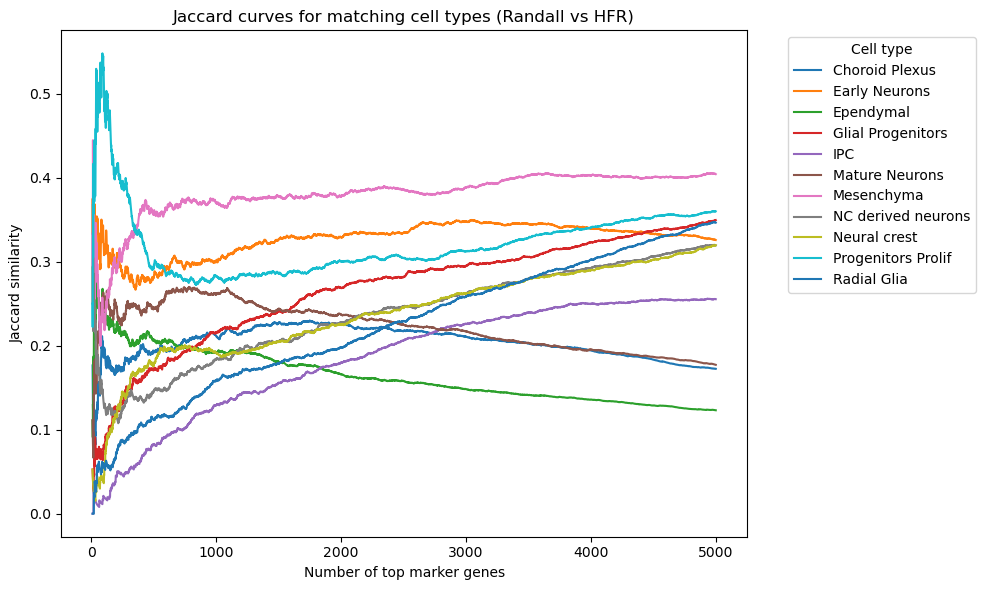

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Dense vector of gene cutoffs
top_ns = np.arange(10, 5001, 1)

results = {}

# Get the intersection of cell types present in both datasets
common_cts = sorted(set(ct_randall) & set(ct_atlas))

for ct in common_cts:
    sims = []
    for n in top_ns:
        set1 = set(df_markers_randall[df_markers_randall['group'] == ct]['names'].head(n))
        set2 = set(df_markers_HFR[df_markers_HFR['group'] == ct]['names'].head(n))
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        sims.append(jaccard)
    results[ct] = sims

# Plot
plt.figure(figsize=(10, 6))
for ct, sims in results.items():
    plt.plot(top_ns, sims, label=ct)

plt.xlabel("Number of top marker genes")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard curves for matching cell types (Randall vs HFR)")
plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [73]:
gc.collect()

4697

### all cell types

In [81]:
top_n = 1500

# Get group labels as strings (e.g. '0', '1', ...)
ct_atlas = df_markers_adata_atlas['group'].unique()  # <-- already strings
ct_randall = df_markers_adata_randall['group'].unique()

atlas_markers = {
    ct: df_markers_adata_atlas[df_markers_adata_atlas['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_atlas
}

randall_markers = {
    ct: df_markers_adata_randall[df_markers_adata_randall['group'] == ct]['names'].head(top_n).tolist()
    for ct in ct_randall
}


In [82]:
randall_marker_sets = {ct: set(genes) for ct, genes in randall_markers.items()}
HFR_marker_sets = {ct: set(genes) for ct, genes in atlas_markers.items()}


In [83]:
import pandas as pd
import numpy as np

jaccard_df = pd.DataFrame(
    np.zeros((len(ct_randall), len(ct_atlas))),
    index=ct_randall,
    columns=ct_atlas
)

for ct1 in ct_randall:
    for ct2 in ct_atlas:
        set1 = randall_marker_sets[ct1]
        set2 = HFR_marker_sets[ct2]
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        jaccard_df.loc[ct1, ct2] = jaccard


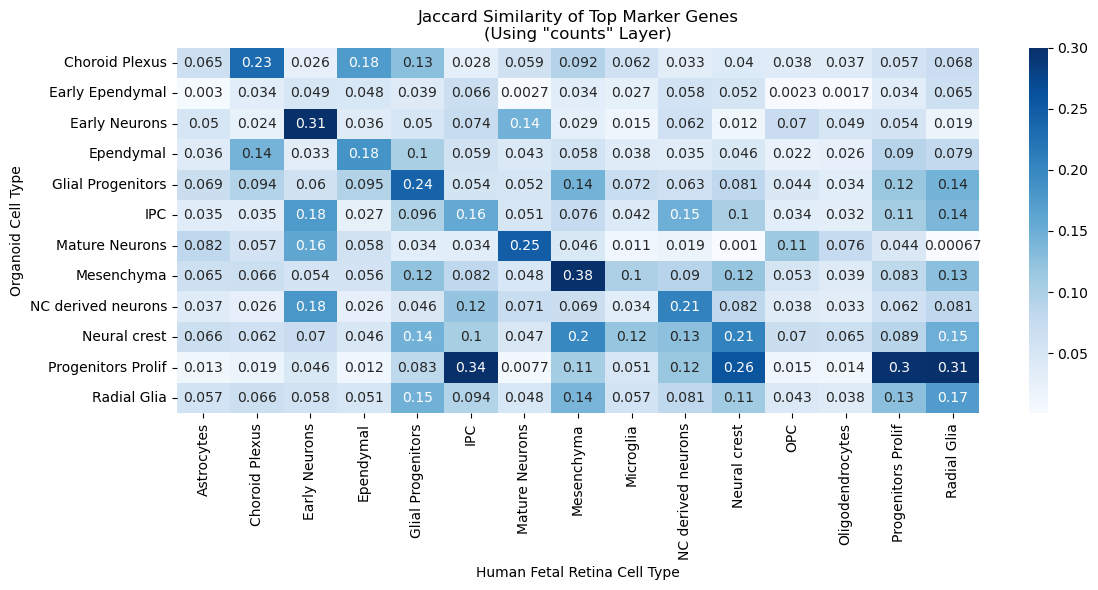

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(jaccard_df, annot=True, cmap='Blues', vmax=0.3, ax=ax)
ax.set_xlabel('Human Fetal Retina Cell Type')
ax.set_ylabel('Organoid Cell Type')
ax.set_title('Jaccard Similarity of Top Marker Genes\n(Using "counts" Layer)')
fig.tight_layout()

# Save in high-res PNG and a vector PDF
#fig.savefig(os.path.join(outdir, "jaccard_heatmap_all_1500.png"), dpi=300, bbox_inches="tight")
fig.savefig( "jaccard_heatmap_all_1500.pdf", bbox_inches="tight")

plt.show()


In [85]:
df_markers_randall = df_markers_adata_randall
df_markers_HFR = df_markers_adata_atlas

In [86]:
gc.collect()

20484

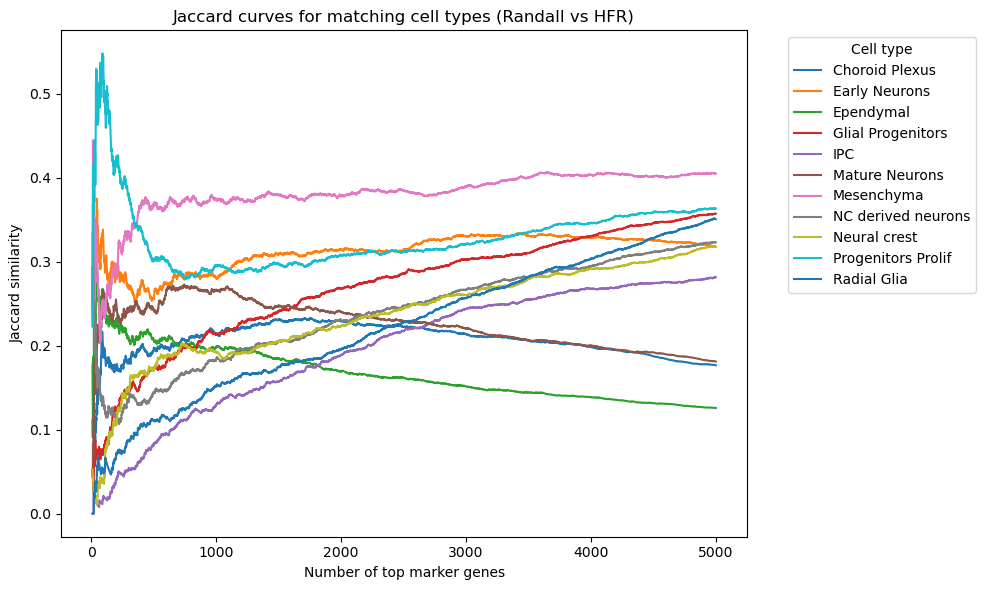

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Dense vector of gene cutoffs
top_ns = np.arange(10, 5001, 1)

results = {}

# Get the intersection of cell types present in both datasets
common_cts = sorted(set(ct_randall) & set(ct_atlas))

for ct in common_cts:
    sims = []
    for n in top_ns:
        set1 = set(df_markers_randall[df_markers_randall['group'] == ct]['names'].head(n))
        set2 = set(df_markers_HFR[df_markers_HFR['group'] == ct]['names'].head(n))
        intersection = set1 & set2
        union = set1 | set2
        jaccard = len(intersection) / len(union) if len(union) > 0 else np.nan
        sims.append(jaccard)
    results[ct] = sims

# Plot
plt.figure(figsize=(10, 6))
for ct, sims in results.items():
    plt.plot(top_ns, sims, label=ct)

plt.xlabel("Number of top marker genes")
plt.ylabel("Jaccard similarity")
plt.title("Jaccard curves for matching cell types (Randall vs HFR)")
plt.legend(title="Cell type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
